# Project Capstone:  NBA PLAYERS SCORING PREDICTION
## Nicolas Monvert, EPFL Extension School 2020
## Part 1 : Data Preparation

### Introduction

I am a passionate about basketball and I have been playing this sport since 1996, therefore it was obvious that I wanted to work on this topic. By definition a good Data Scientist (which I don't pretend to be today) has to not only have some good knownledge in Math/Statistics and in Computer Science, but also to be a subject matter expert. 

In this following exercice, I would like to build __a supervised machine learning__ model based on historical data to predict the number of points made by a single player, for any specific game. I am using data from the NBA (National Basketball Association) which is by far the most famous and renowned league around the world. Based on the data available, I don't expect to have an incredibly high accuracy, because not all parameters can be retrieved on a dataset (such as the player mood and other external factors), but more to be able to extract some trends. __My target will be to predict the number of points made per game for a chosen player__.

My work is split in 3 notebooks:
 - This one treats how to prepare the data; from merging multiple dataframe together, cleaning some irrelevant data and creating new features to try to enhance the robustness of my models.
 - The second one about Exploratory Data Analysis will go into details of the Dataframes we built over the first notebooks. Although some information will display comparison amongst all players, a focus will be done on Lebron James.
 - The last notebooks will work on my regression problem with the application of some models to have the most accurate prediction of point scored for one player. On top of this, I duplicated this part to apply to one other player to compare results.
 
Note that for the sake of this exercice and due to the size of my dataset, I want to focus only on 1 player. However, I built my notebooks in a way that it is easily exportable for other players.

Good reading!

In [2]:
from IPython.display import Image

<img src="nba1.jpg" width="300" align="center"/>

### Import main librairies

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Load 3 csv files into dataframe

To build a comprehensive dataset, I combine 3 different dataframes to have all information in one.<br><br>
___1st Dataset___

In [4]:
games_full = pd.read_csv('games_details.csv')
games_full.head(3)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,NaN,27:08,3.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,NaN,34:55,17.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,NaN,26:25,4.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0


Some basics information about this dataset.

This set of data is providing information per player per each game played:
 - The ID of the game played
 - The ID of his team (+some nominal information for the team)
 - The ID of the player and his name
 - Nominal information about the starting position
 - Number of minutes played during the game
 - A bunch of continous data about the performance during the game (Number of shots taken, number of shot made, field goal percentages, number of rebounds, assists, steal, blocks, turnover (losing the ball), faults and plus minus (indicator of the player impact during the game).
 - Obviously my target; number of point made.
 
More details on the feature kept will be shared later on.

In [5]:
# To have a statistical overview of our data
games_full.describe().T

,count,mean,std,min,25%,50%,75%,max
GAME_ID,576782.0,2.153582e+07,5.496051e+06,1.030000e+07,2.060063e+07,2.110046e+07,2.160020e+07,4.180041e+07
TEAM_ID,576782.0,1.610613e+09,8.659398e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PLAYER_ID,576782.0,2.793802e+05,7.768096e+06,1.500000e+01,2.366000e+03,2.007570e+05,2.026930e+05,1.962938e+09
FGM,484521.0,3.561808e+00,3.007389e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.800000e+01
FGA,484521.0,7.859736e+00,5.638048e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.100000e+01,5.000000e+01
FG_PCT,484521.0,4.151030e-01,2.515667e-01,0.000000e+00,2.500000e-01,4.290000e-01,5.630000e-01,1.000000e+00
FG3M,484521.0,7.197397e-01,1.175101e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01
FG3A,484521.0,2.024738e+00,2.456552e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.400000e+01
FG3_PCT,484521.0,1.924704e-01,2.885316e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.330000e-01,1.000000e+00
FTM,484521.0,1.752254e+00,2.365303e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.600000e+01


___2nd Dataset___

In [6]:
games = pd.read_csv('games.csv')
games.head(3)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,22.0,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,19.0,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,25.0,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1


This dataset will provide some relevant features to my models.
I'll use the "games" to extract information such as:
 - Team ID to know the two teams playing for a single game.
 - Season, to know on which one a single game takes place.
 - And in order to know the strenght of the teams, to create a measure with the % of win averaged per season.
 - Last column 'Home team wins' to determine the winner.

In [7]:
# To have a statistical overview of our data
games.describe().T

,count,mean,std,min,25%,50%,75%,max
GAME_ID,23195.0,2.156394e+07,5.451505e+06,1.030000e+07,2.060059e+07,2.110024e+07,2.160013e+07,4.180041e+07
HOME_TEAM_ID,23195.0,1.610613e+09,8.649845e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
VISITOR_TEAM_ID,23195.0,1.610613e+09,8.664090e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
SEASON,23195.0,2.010844e+03,4.829889e+00,2.003000e+03,2.007000e+03,2.011000e+03,2.015000e+03,2.019000e+03
TEAM_ID_home,23195.0,1.610613e+09,8.649845e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PTS_home,23096.0,1.021491e+02,1.290219e+01,3.600000e+01,9.300000e+01,1.020000e+02,1.110000e+02,1.680000e+02
FG_PCT_home,23096.0,4.599013e-01,5.679371e-02,2.500000e-01,4.200000e-01,4.590000e-01,5.000000e-01,6.840000e-01
FT_PCT_home,23096.0,7.578742e-01,1.003966e-01,1.430000e-01,6.960000e-01,7.650000e-01,8.260000e-01,1.000000e+00
FG3_PCT_home,23096.0,3.554583e-01,1.146831e-01,0.000000e+00,2.810000e-01,3.550000e-01,4.290000e-01,1.000000e+00
AST_home,23096.0,2.251225e+01,5.153124e+00,6.000000e+00,1.900000e+01,2.200000e+01,2.600000e+01,4.700000e+01


___3rd Dataset___

This dataset is only providing information that is hidden behind the ID, namely the name to identify the team. This dataset will be used only for those data, therefore, no need to know more about it.

In [8]:
teams = pd.read_csv('teams.csv')
teams.head(3)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate


Some more information about my datasets such as shape and data types.

In [9]:
# Check the size of above DFs
print('games_full',games_full.shape)
print('games',games.shape)
print('teams',teams.shape)

games_full (576782, 28)
games (23195, 21)
teams (30, 14)


In [10]:
# Use info to learn about the format and type of information present
print('games_full',games_full.info())
print('games',games.info())
print('teams',teams.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576782 entries, 0 to 576781
Data columns (total 28 columns):
GAME_ID              576782 non-null int64
TEAM_ID              576782 non-null int64
TEAM_ABBREVIATION    576782 non-null object
TEAM_CITY            576782 non-null object
PLAYER_ID            576782 non-null int64
PLAYER_NAME          576782 non-null object
START_POSITION       221374 non-null object
COMMENT              92260 non-null object
MIN                  484521 non-null object
FGM                  484521 non-null float64
FGA                  484521 non-null float64
FG_PCT               484521 non-null float64
FG3M                 484521 non-null float64
FG3A                 484521 non-null float64
FG3_PCT              484521 non-null float64
FTM                  484521 non-null float64
FTA                  484521 non-null float64
FT_PCT               484521 non-null float64
OREB                 484521 non-null float64
DREB                 484521 non-null float64
RE

Now that we have an better overview of our CSV, let's work on them.

Firstly, I generate the percentage of win per season and per team. This will determine the strenght of the team and its opponent during the season.
I treat this as a __separate feature engineering__ from the others (I have a dedicated section below), because it is the only one to be performed directly on the games.csv file.

To build this feature, it needs some calculation. I create one column that are the percentage of win for the visitor, based on the column 'Home team win'. Then I group the results per season on 2 DataFrames and I take the 2 results obtained and divide them by 2 (teams are playing 50/50 between away and home). Eventually add in my dataframe games.

I consider this feature engineering step as warm up for what is coming next.

In [11]:
# Create a column "Visitor_Team_Wins" that is displaying the opposite of the binary value from the "Home_Team_Wins"
def a(x):
    if x['HOME_TEAM_WINS'] == 0:
        val = 1
    else:
        val = 0
    return val
games['VISITOR_TEAM_WINS'] = games.apply(a, axis=1)
games.head(3)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,VISITOR_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0,1
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0,1
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1,0


In [12]:
# Create % of win per team per season when they play home
PerWin=games.groupby(['HOME_TEAM_ID','SEASON'], as_index=False)['HOME_TEAM_WINS'].mean()
# Create % of win per team per season when they play away
PerWin1=games.groupby(['VISITOR_TEAM_ID','SEASON'], as_index=False)['VISITOR_TEAM_WINS'].mean()
# Artificialy rename the first column to match PerWin
PerWin=PerWin.rename({'HOME_TEAM_ID':'VISITOR_TEAM_ID'}, axis=1)
# Merge the 2 df
PerWin=PerWin.merge(PerWin1, on=['VISITOR_TEAM_ID','SEASON'])
# Take the average of the 2 column to have the final % (same number of games home and away)
PerWin['VISITOR_PCT_WIN']=(PerWin['HOME_TEAM_WINS']+PerWin['VISITOR_TEAM_WINS'])/2
# Add the new calculation to the right team within games df
games=games.merge(PerWin, how='inner', on=['VISITOR_TEAM_ID','SEASON'])
# Remove unnecessary colums
games.drop(['HOME_TEAM_WINS_y','VISITOR_TEAM_WINS_y'],axis=1,inplace=True)

In [13]:
games.head(2)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS_x,VISITOR_TEAM_WINS_x,VISITOR_PCT_WIN
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0,1,0.877367
1,2020-02-25,21900858,Final,1610612761,1610612749,2019,1610612761,97.0,0.352,0.714,...,1610612749,108.0,0.381,0.833,0.333,23.0,53.0,0,1,0.877367


In [14]:
# Doing the same for home team % win.
PerWin2=PerWin
PerWin2=PerWin2.rename({'VISITOR_TEAM_ID':'HOME_TEAM_ID'}, axis=1)
PerWin2['HOME_PCT_WIN']=(PerWin2['HOME_TEAM_WINS']+PerWin2['VISITOR_TEAM_WINS'])/2
games=games.merge(PerWin2, how='inner', on=['HOME_TEAM_ID','SEASON'])
games.head(1)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS_x,VISITOR_TEAM_WINS_x,VISITOR_PCT_WIN_x,HOME_TEAM_WINS,VISITOR_TEAM_WINS,VISITOR_PCT_WIN_y,HOME_PCT_WIN
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.9,...,0.226,20.0,61.0,0,1,0.877367,0.290323,0.382353,0.336338,0.336338


In [15]:
# Remove unnecessary colums and do some cleaning
games.drop(['HOME_TEAM_WINS','VISITOR_TEAM_WINS','VISITOR_PCT_WIN_y'],axis=1,inplace=True)
games=games.rename({'VISITOR_PCT_WIN_x':'VISITOR_PCT_WIN'}, axis=1)

In [16]:
print(games.shape)
games.head()

(23195, 24)


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS_x,VISITOR_TEAM_WINS_x,VISITOR_PCT_WIN,HOME_PCT_WIN
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,93.0,0.402,0.762,0.226,20.0,61.0,0,1,0.877367,0.336338
1,2020-01-24,21900669,Final,1610612766,1610612749,2019,1610612766,103.0,0.372,0.833,...,116.0,0.506,0.750,0.278,26.0,53.0,0,1,0.877367,0.336338
2,2020-02-08,21900778,Final,1610612766,1610612742,2019,1610612766,100.0,0.437,0.722,...,116.0,0.506,1.000,0.486,29.0,46.0,0,1,0.589154,0.336338
3,2019-10-11,11900040,Final,1610612766,1610612755,2019,1610612766,87.0,0.363,0.885,...,100.0,0.458,0.682,0.250,27.0,49.0,0,1,0.619792,0.336338
4,2020-01-08,21900555,Final,1610612766,1610612761,2019,1610612766,110.0,0.442,0.731,...,112.0,0.447,0.700,0.389,34.0,46.0,0,1,0.686275,0.336338


It might not be the easiest way to get my results, but it worked. I compared the results with the official ones, and I have the same results.

### Merge 3 dataframes into 1

As mentionned before, the aim here is to add some columns to the main notebook games_full to be able to read the real data behind an ID (e.g. a Team name). Also, this will enable to bring more features and data to analyse.

In [17]:
# Including data from games to games_full
games_full=games_full.merge(games, on='GAME_ID')

In [18]:
games_full.shape

(576782, 51)

The number of columns in games_full has increased by 20, which is correct. Now we have to use the file Teams that will provide us the actual names (and not ID).

As the only thing that we need from the 3rd dataset is the 'CITY" based on TEAM_ID, let's create a dictionnary that could be used for our look up.

In [19]:
teams.set_index('TEAM_ID', inplace=True)
teams=teams['CITY']
teams.head(2)

TEAM_ID
1610612737    Atlanta
1610612738     Boston
Name: CITY, dtype: object

In [20]:
teams.to_dict(dict)

{1610612737: 'Atlanta',
 1610612738: 'Boston',
 1610612740: 'New Orleans',
 1610612741: 'Chicago',
 1610612742: 'Dallas',
 1610612743: 'Denver',
 1610612745: 'Houston',
 1610612746: 'Los Angeles',
 1610612747: 'Los Angeles',
 1610612748: 'Miami',
 1610612749: 'Milwaukee',
 1610612750: 'Minnesota',
 1610612751: 'Brooklyn',
 1610612752: 'New York',
 1610612753: 'Orlando',
 1610612754: 'Indiana',
 1610612755: 'Philadelphia',
 1610612756: 'Phoenix',
 1610612757: 'Portland',
 1610612758: 'Sacramento',
 1610612759: 'San Antonio',
 1610612760: 'Oklahoma City',
 1610612761: 'Toronto',
 1610612762: 'Utah',
 1610612763: 'Memphis',
 1610612764: 'Washington',
 1610612765: 'Detroit',
 1610612766: 'Charlotte',
 1610612739: 'Cleveland',
 1610612744: 'Golden State'}

Now create 2 columns with team city name into the main dataframe.

In [21]:
games_full['HOME_TEAM_CITY'] = games_full.HOME_TEAM_ID.map(teams)
games_full['VISITOR_TEAM_CITY'] = games_full.VISITOR_TEAM_ID.map(teams)

In [22]:
games_full.head(2)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS_x,VISITOR_TEAM_WINS_x,VISITOR_PCT_WIN,HOME_PCT_WIN,HOME_TEAM_CITY,VISITOR_TEAM_CITY
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,NaN,27:08,3.0,...,0.762,0.226,20.0,61.0,0,1,0.877367,0.336338,Charlotte,Milwaukee
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,NaN,34:55,17.0,...,0.762,0.226,20.0,61.0,0,1,0.877367,0.336338,Charlotte,Milwaukee


Now, we have linked our 3 dataframe in one. We can start doing some cleaning to get rid of useless data. To be on a safe side. As of now, let's work on a new df.

In [23]:
main=games_full

### Cleaning the DF

__Removing players (rows - Reduce Cardinality)__ with not sufficient / relevant number of game played for potential analysis. Based on a threshold of overall 250 games played.

In [24]:
main['PLAYER_NAME'].describe()

count           576782
unique            2294
top       LeBron James
freq              1607
Name: PLAYER_NAME, dtype: object

In [25]:
avg_played=main['PLAYER_NAME'].value_counts().mean()
median_played=main['PLAYER_NAME'].value_counts().median()
print('Average of games played per player in the dataset:', avg_played)
print('Median of games played per player in the dataset:', median_played)

Average of games played per player in the dataset: 251.4306887532694
Median of games played per player in the dataset: 103.0


As we can see, the average is around 250 games, and the median is way lower. This is explainable because a lot of players are (unfortunately) excluded from the roster after a couple of games, then it brings this number down. Before removing them, just plot their repartition (more visual analysis on the EDA part).

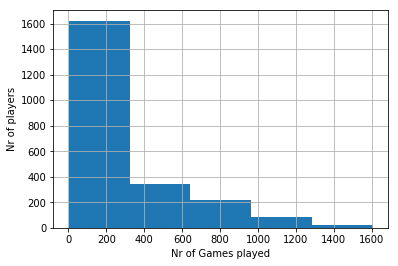

In [26]:
ax=main.PLAYER_NAME.value_counts().hist(bins=5)
ax.set_xlabel("Nr of Games played")
ax.set_ylabel('Nr of players');

It confirms what we discussed before, the biggest part of players did not played more than 300 games.

In [27]:
# Keeping only those with more than 250 games
items = main.PLAYER_NAME.value_counts().to_dict().items()
main = main[main.PLAYER_NAME.isin([key for key, val in items if val > 250])]

In [28]:
main.shape

(485141, 53)

As we see, we cleaned about 100k rows.

__Removing columns__ with information that is decorellated and keeping only factual feature such as teams, date (then weekday), location of the game, season, opponent team, starting position, and a couple of games statistics (such as % of field goal attempt, rebounds, etc...). More information of my choices in the proposal part.

In [29]:
# To display columns names
list(main)

['GAME_ID',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'TEAM_CITY',
 'PLAYER_ID',
 'PLAYER_NAME',
 'START_POSITION',
 'COMMENT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TO',
 'PF',
 'PTS',
 'PLUS_MINUS',
 'GAME_DATE_EST',
 'GAME_STATUS_TEXT',
 'HOME_TEAM_ID',
 'VISITOR_TEAM_ID',
 'SEASON',
 'TEAM_ID_home',
 'PTS_home',
 'FG_PCT_home',
 'FT_PCT_home',
 'FG3_PCT_home',
 'AST_home',
 'REB_home',
 'TEAM_ID_away',
 'PTS_away',
 'FG_PCT_away',
 'FT_PCT_away',
 'FG3_PCT_away',
 'AST_away',
 'REB_away',
 'HOME_TEAM_WINS_x',
 'VISITOR_TEAM_WINS_x',
 'VISITOR_PCT_WIN',
 'HOME_PCT_WIN',
 'HOME_TEAM_CITY',
 'VISITOR_TEAM_CITY']

In [30]:
# keep only relevant column
main = main.loc[:,['GAME_ID','TEAM_ID','TEAM_CITY','PLAYER_NAME','START_POSITION','FG_PCT','FGA','FGM','REB','MIN','PTS','PLUS_MINUS','GAME_DATE_EST',
                   'SEASON','TEAM_ID_home','HOME_TEAM_CITY','HOME_PCT_WIN','HOME_TEAM_WINS_x','VISITOR_TEAM_CITY','VISITOR_PCT_WIN','VISITOR_TEAM_WINS_x']]
main.head(5)

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,FG_PCT,FGA,FGM,REB,MIN,...,PLUS_MINUS,GAME_DATE_EST,SEASON,TEAM_ID_home,HOME_TEAM_CITY,HOME_PCT_WIN,HOME_TEAM_WINS_x,VISITOR_TEAM_CITY,VISITOR_PCT_WIN,VISITOR_TEAM_WINS_x
0,21900895,1610612749,Milwaukee,Wesley Matthews,F,0.273,11.0,3.0,8.0,27:08,...,11.0,2020-03-01,2019,1610612766,Charlotte,0.336338,0,Milwaukee,0.877367,1
1,21900895,1610612749,Milwaukee,Giannis Antetokounmpo,F,0.607,28.0,17.0,20.0,34:55,...,22.0,2020-03-01,2019,1610612766,Charlotte,0.336338,0,Milwaukee,0.877367,1
2,21900895,1610612749,Milwaukee,Brook Lopez,C,0.364,11.0,4.0,7.0,26:25,...,16.0,2020-03-01,2019,1610612766,Charlotte,0.336338,0,Milwaukee,0.877367,1
4,21900895,1610612749,Milwaukee,Eric Bledsoe,G,0.250,8.0,2.0,1.0,22:17,...,6.0,2020-03-01,2019,1610612766,Charlotte,0.336338,0,Milwaukee,0.877367,1
5,21900895,1610612749,Milwaukee,Pat Connaughton,NaN,0.400,5.0,2.0,5.0,24:52,...,0.0,2020-03-01,2019,1610612766,Charlotte,0.336338,0,Milwaukee,0.877367,1


In [31]:
main.shape

(485141, 21)

I drastically reduced the number of column to have only the ones I am interested in.

Check the __missing values__

In [32]:
main.isnull().sum()

GAME_ID                     0
TEAM_ID                     0
TEAM_CITY                   0
PLAYER_NAME                 0
START_POSITION         276569
FG_PCT                  64485
FGA                     64485
FGM                     64485
REB                     64485
MIN                     64485
PTS                     64485
PLUS_MINUS              83306
GAME_DATE_EST               0
SEASON                      0
TEAM_ID_home                0
HOME_TEAM_CITY              0
HOME_PCT_WIN                0
HOME_TEAM_WINS_x            0
VISITOR_TEAM_CITY           0
VISITOR_PCT_WIN             0
VISITOR_TEAM_WINS_x         0
dtype: int64

Pretty luckily, our dataframe is pretty clean. Let me explain the reason why we have the above missing values.
 - START_POSITION : Because out of 12 players per team, only five are actually starting the game.
 - MIN, FG_PCT and PTS : If a player is not playing any minutes, obviously he won't have any points.
 - PLUS_MINUS : It is an evaluation done to determine the impact of the player during the time he went on the field. But to get this evaluation entering the game is not enough.

In [33]:
#start position put substitute instead of NaN
main['START_POSITION'].fillna('substitute', inplace=True)

In [34]:
#keep only rows where MIN are not NaN, because we can't evaluate a player when he did not play
main=main[main['MIN'].notna()]

Eventually replace the eval of PLUS_MINUS by a 0, it gives a neutral evaluation.

In [35]:
main['PLUS_MINUS'].fillna(0, inplace=True)

In [36]:
main.isnull().sum()

GAME_ID                0
TEAM_ID                0
TEAM_CITY              0
PLAYER_NAME            0
START_POSITION         0
FG_PCT                 0
FGA                    0
FGM                    0
REB                    0
MIN                    0
PTS                    0
PLUS_MINUS             0
GAME_DATE_EST          0
SEASON                 0
TEAM_ID_home           0
HOME_TEAM_CITY         0
HOME_PCT_WIN           0
HOME_TEAM_WINS_x       0
VISITOR_TEAM_CITY      0
VISITOR_PCT_WIN        0
VISITOR_TEAM_WINS_x    0
dtype: int64

In [37]:
main.shape

(420656, 21)

Now the dataframe starts looking good!

### Formatting the data

Transform MIN into readable cells, to actually be able to average them.

In [38]:
main['MIN'].head(2)

0    27:08
1    34:55
Name: MIN, dtype: object

In [39]:
# Here I convert the minutes into a date format
import datetime as dt
main['MIN'] = pd.to_datetime(main['MIN'], format='%M:%S',errors='coerce')

In [40]:
main['MIN'].head()

0   1900-01-01 00:27:08
1   1900-01-01 00:34:55
2   1900-01-01 00:26:25
4   1900-01-01 00:22:17
5   1900-01-01 00:24:52
Name: MIN, dtype: datetime64[ns]

I am actually just interested in the minutes played, especially because I'll make average per season.

In [41]:
main['MIN'] = pd.to_datetime(main['MIN'], format='%M:%S',errors='coerce').dt.minute

In [42]:
main['MIN'].head()

0    27.0
1    34.0
2    26.0
4    22.0
5    24.0
Name: MIN, dtype: float64

Just a quick check that the average minutes played is actually realistic. It is the case.

In [43]:
main['MIN'].mean()

23.88582897615143

### Feature engineering

This is the longest part of the notebook. As previously mentioned, I want to create a bunch of new feature that consits of season average. On top of this, I will create some binary columns and eventually perform one-hot encoding on my remaining categorical feature.<br><br>
To start I create a new column with the average minutes per season per player, doing the same the of 'PLUS_MINUS' (Which is is a measure of the point differential when players are in and out of a game) and others measures based on the performance. This will provide us information about the impact the player has on the current season. 

__Adding Average Minutes per Season, per player__

In [44]:
# Create a 'MIN' average per player and per season
Mean_Min_perY=main.groupby(['PLAYER_NAME','SEASON'], as_index=False)['MIN'].mean()
Mean_Min_perY.head(5)

,PLAYER_NAME,SEASON,MIN
0,AJ Price,2009,15.053571
1,AJ Price,2010,15.400000
2,AJ Price,2011,11.479167
3,AJ Price,2012,21.929825
4,AJ Price,2013,3.142857


Quick check that everything went well on a well known player.

In [45]:
Mean_Min_perY[Mean_Min_perY['PLAYER_NAME']=='LeBron James'].head(5)

,PLAYER_NAME,SEASON,MIN
3837,LeBron James,2003,39.139241
3838,LeBron James,2004,41.887500
3839,LeBron James,2005,42.586957
3840,LeBron James,2006,41.173469
3841,LeBron James,2007,40.193182


In [46]:
# Rename column to avoid confusion between minutes and the new average created
Mean_Min_perY = Mean_Min_perY.rename({'MIN': 'AvgMIN'}, axis=1)
Mean_Min_perY.head(1)

,PLAYER_NAME,SEASON,AvgMIN
0,AJ Price,2009,15.053571


In [47]:
# Merging the 2 dataframes
main=main.merge(Mean_Min_perY, how='inner', left_on=['PLAYER_NAME', 'SEASON'], right_on=['PLAYER_NAME', 'SEASON'])

In [48]:
main[main['PLAYER_NAME']=='LeBron James'].head(2)

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,FG_PCT,FGA,FGM,REB,MIN,...,GAME_DATE_EST,SEASON,TEAM_ID_home,HOME_TEAM_CITY,HOME_PCT_WIN,HOME_TEAM_WINS_x,VISITOR_TEAM_CITY,VISITOR_PCT_WIN,VISITOR_TEAM_WINS_x,AvgMIN
3244,21900900,1610612747,Los Angeles,LeBron James,F,0.667,21.0,14.0,12.0,36.0,...,2020-03-01,2019,1610612740,New Orleans,0.474383,0,Los Angeles,0.753321,1,33.45
3245,21900891,1610612747,Los Angeles,LeBron James,F,0.444,18.0,8.0,8.0,34.0,...,2020-02-29,2019,1610612763,Memphis,0.475302,1,Los Angeles,0.753321,0,33.45


__Adding Average PLUS_MINUS per season, per player__

I will the same steps as I just did with the minutes.

In [49]:
# Quick check of the data type
main['PLUS_MINUS'].dtypes

dtype('float64')

In [50]:
# # Create a 'MIN' average per player and per season
Mean_PM_perY=main.groupby(['PLAYER_NAME','SEASON'], as_index=False)['PLUS_MINUS'].mean()
Mean_PM_perY.head(3)

,PLAYER_NAME,SEASON,PLUS_MINUS
0,AJ Price,2009,0.790323
1,AJ Price,2010,0.193548
2,AJ Price,2011,0.551020


In [51]:
Mean_PM_perY[Mean_PM_perY['PLAYER_NAME']=='LeBron James'].head(5)

,PLAYER_NAME,SEASON,PLUS_MINUS
3837,LeBron James,2003,-1.777778
3838,LeBron James,2004,1.841463
3839,LeBron James,2005,2.329897
3840,LeBron James,2006,4.359223
3841,LeBron James,2007,2.170213


In [52]:
Mean_PM_perY = Mean_PM_perY.rename({'PLUS_MINUS': 'AvgPLUS_MINUS'}, axis=1)
Mean_PM_perY.head(1)

,PLAYER_NAME,SEASON,AvgPLUS_MINUS
0,AJ Price,2009,0.790323


In [53]:
main=main.merge(Mean_PM_perY, how='inner', left_on=['PLAYER_NAME', 'SEASON'], right_on=['PLAYER_NAME', 'SEASON'])

In [54]:
main[main['PLAYER_NAME']=='LeBron James'].head(2)

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,FG_PCT,FGA,FGM,REB,MIN,...,SEASON,TEAM_ID_home,HOME_TEAM_CITY,HOME_PCT_WIN,HOME_TEAM_WINS_x,VISITOR_TEAM_CITY,VISITOR_PCT_WIN,VISITOR_TEAM_WINS_x,AvgMIN,AvgPLUS_MINUS
3244,21900900,1610612747,Los Angeles,LeBron James,F,0.667,21.0,14.0,12.0,36.0,...,2019,1610612740,New Orleans,0.474383,0,Los Angeles,0.753321,1,33.45,8.35
3245,21900891,1610612747,Los Angeles,LeBron James,F,0.444,18.0,8.0,8.0,34.0,...,2019,1610612763,Memphis,0.475302,1,Los Angeles,0.753321,0,33.45,8.35


__Adding Average FG percentage (Field goal) per season, per player__

I will the same steps as I just did with the minutes and the PLUS_MINUS.

In [55]:
# Quick check of the data type
main['FG_PCT'].dtypes

dtype('float64')

In [56]:
# # Create a FG_PCT average per player and per season
Mean_FG_perY=main.groupby(['PLAYER_NAME','SEASON'], as_index=False)['FG_PCT'].mean()
Mean_FG_perY.head(3)

,PLAYER_NAME,SEASON,FG_PCT
0,AJ Price,2009,0.391581
1,AJ Price,2010,0.357694
2,AJ Price,2011,0.289388


In [57]:
Mean_FG_perY = Mean_FG_perY.rename({'FG_PCT': 'AvgFG_PCT'}, axis=1)
Mean_FG_perY.head(1)

,PLAYER_NAME,SEASON,AvgFG_PCT
0,AJ Price,2009,0.391581


In [58]:
main=main.merge(Mean_FG_perY, how='inner', left_on=['PLAYER_NAME', 'SEASON'], right_on=['PLAYER_NAME', 'SEASON'])

In [59]:
main[main['PLAYER_NAME']=='LeBron James'].head(2)

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,FG_PCT,FGA,FGM,REB,MIN,...,TEAM_ID_home,HOME_TEAM_CITY,HOME_PCT_WIN,HOME_TEAM_WINS_x,VISITOR_TEAM_CITY,VISITOR_PCT_WIN,VISITOR_TEAM_WINS_x,AvgMIN,AvgPLUS_MINUS,AvgFG_PCT
3244,21900900,1610612747,Los Angeles,LeBron James,F,0.667,21.0,14.0,12.0,36.0,...,1610612740,New Orleans,0.474383,0,Los Angeles,0.753321,1,33.45,8.35,0.491433
3245,21900891,1610612747,Los Angeles,LeBron James,F,0.444,18.0,8.0,8.0,34.0,...,1610612763,Memphis,0.475302,1,Los Angeles,0.753321,0,33.45,8.35,0.491433


Finally, create same feature for __FGA__ (Field goal attempt), __FGM__ (Field goal made), __REB__ (rebounds) as we noted that we could have a correlation with our target.

In [60]:
Mean_FGA_perY=main.groupby(['PLAYER_NAME','SEASON'], as_index=False)['FGA'].mean()
Mean_FGA_perY = Mean_FGA_perY.rename({'FGA': 'AvgFGA'}, axis=1)
main=main.merge(Mean_FGA_perY, how='inner', left_on=['PLAYER_NAME', 'SEASON'], right_on=['PLAYER_NAME', 'SEASON'])

In [61]:
Mean_FGM_perY=main.groupby(['PLAYER_NAME','SEASON'], as_index=False)['FGM'].mean()
Mean_FGM_perY = Mean_FGM_perY.rename({'FGM': 'AvgFGM'}, axis=1)
main=main.merge(Mean_FGM_perY, how='inner', left_on=['PLAYER_NAME', 'SEASON'], right_on=['PLAYER_NAME', 'SEASON'])

In [62]:
Mean_REB_perY=main.groupby(['PLAYER_NAME','SEASON'], as_index=False)['REB'].mean()
Mean_REB_perY = Mean_REB_perY.rename({'REB': 'AvgREB'}, axis=1)
main=main.merge(Mean_REB_perY, how='inner', left_on=['PLAYER_NAME', 'SEASON'], right_on=['PLAYER_NAME', 'SEASON'])

In [63]:
main.head()

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,FG_PCT,FGA,FGM,REB,MIN,...,HOME_TEAM_WINS_x,VISITOR_TEAM_CITY,VISITOR_PCT_WIN,VISITOR_TEAM_WINS_x,AvgMIN,AvgPLUS_MINUS,AvgFG_PCT,AvgFGA,AvgFGM,AvgREB
0,21900895,1610612749,Milwaukee,Wesley Matthews,F,0.273,11.0,3.0,8.0,27.0,...,0,Milwaukee,0.877367,1,23.885246,7.737705,0.374016,6.42623,2.590164,2.57377
1,21900882,1610612749,Milwaukee,Wesley Matthews,G,0.455,11.0,5.0,6.0,27.0,...,1,Oklahoma City,0.601927,0,23.885246,7.737705,0.374016,6.42623,2.590164,2.57377
2,21900858,1610612749,Milwaukee,Wesley Matthews,G,0.333,6.0,2.0,1.0,20.0,...,0,Milwaukee,0.877367,1,23.885246,7.737705,0.374016,6.42623,2.590164,2.57377
3,21900851,1610612749,Milwaukee,Wesley Matthews,G,0.500,6.0,3.0,0.0,23.0,...,0,Milwaukee,0.877367,1,23.885246,7.737705,0.374016,6.42623,2.590164,2.57377
4,21900840,1610612749,Milwaukee,Wesley Matthews,G,0.500,4.0,2.0,3.0,20.0,...,1,Philadelphia,0.619792,0,23.885246,7.737705,0.374016,6.42623,2.590164,2.57377


In [64]:
# Quick check
main.isnull().sum()

GAME_ID                    0
TEAM_ID                    0
TEAM_CITY                  0
PLAYER_NAME                0
START_POSITION             0
FG_PCT                     0
FGA                        0
FGM                        0
REB                        0
MIN                    18829
PTS                        0
PLUS_MINUS                 0
GAME_DATE_EST              0
SEASON                     0
TEAM_ID_home               0
HOME_TEAM_CITY             0
HOME_PCT_WIN               0
HOME_TEAM_WINS_x           0
VISITOR_TEAM_CITY          0
VISITOR_PCT_WIN            0
VISITOR_TEAM_WINS_x        0
AvgMIN                   262
AvgPLUS_MINUS              0
AvgFG_PCT                  0
AvgFGA                     0
AvgFGM                     0
AvgREB                     0
dtype: int64

In [65]:
# to visualise where we have some Nan
main[main['AvgMIN'].isnull()].head()

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,FG_PCT,FGA,FGM,REB,MIN,...,HOME_TEAM_WINS_x,VISITOR_TEAM_CITY,VISITOR_PCT_WIN,VISITOR_TEAM_WINS_x,AvgMIN,AvgPLUS_MINUS,AvgFG_PCT,AvgFGA,AvgFGM,AvgREB
39045,10800110,1610612760,Oklahoma City,John Lucas III,substitute,0.000,1.0,0.0,0.0,NaN,...,1,Oklahoma City,0.274316,0,NaN,0.0,0.391750,3.25,1.500000,1.000000
39046,10800104,1610612760,Oklahoma City,John Lucas III,substitute,0.400,5.0,2.0,0.0,NaN,...,1,Oklahoma City,0.274316,0,NaN,0.0,0.391750,3.25,1.500000,1.000000
39047,10800048,1610612760,Oklahoma City,John Lucas III,substitute,0.667,3.0,2.0,2.0,NaN,...,0,Los Angeles,0.247222,1,NaN,0.0,0.391750,3.25,1.500000,1.000000
39048,10800038,1610612760,Oklahoma City,John Lucas III,substitute,0.500,4.0,2.0,2.0,NaN,...,1,Oklahoma City,0.274316,0,NaN,0.0,0.391750,3.25,1.500000,1.000000
39049,10800088,1610612743,Denver,Ruben Patterson,substitute,0.556,9.0,5.0,1.0,NaN,...,0,Denver,0.665276,1,NaN,0.0,0.593333,6.50,3.333333,1.833333


As we see, we have some NaN in AvgMIN and MIN. This is due to the transformation we did from datetime as some data we badly formated (NaN AvgMIN represent 0.06% of the full dataset, then no need to worry) . Anyway we have to remove the few NaN in AvgMIN as we are going to actually work on it. We will not work in any ML model with the MIN feature, then it does not bother to keep them.

In [66]:
main=main[main['AvgMIN'].notna()]

In [67]:
# check
print(main.isnull().sum())
print(main.shape)

GAME_ID                    0
TEAM_ID                    0
TEAM_CITY                  0
PLAYER_NAME                0
START_POSITION             0
FG_PCT                     0
FGA                        0
FGM                        0
REB                        0
MIN                    18567
PTS                        0
PLUS_MINUS                 0
GAME_DATE_EST              0
SEASON                     0
TEAM_ID_home               0
HOME_TEAM_CITY             0
HOME_PCT_WIN               0
HOME_TEAM_WINS_x           0
VISITOR_TEAM_CITY          0
VISITOR_PCT_WIN            0
VISITOR_TEAM_WINS_x        0
AvgMIN                     0
AvgPLUS_MINUS              0
AvgFG_PCT                  0
AvgFGA                     0
AvgFGM                     0
AvgREB                     0
dtype: int64
(420394, 27)


__Extract weekday and months__

Out of the date, create new variable such as the weekday and the months. My intuition is that the day could potentially have an impact, but it is almost sure that the month has one, because it determines the progress of the season and the type of games (regular seasons or playoffs). This will be checked and confirmed in my EDA.

In [68]:
# Check the current format
main['GAME_DATE_EST'].dtypes

dtype('O')

In [69]:
# Transform it into date datetime
main['GAME_DATE_EST'] = pd.to_datetime(main['GAME_DATE_EST'])
# Add a column with weekday
main['weekday'] = main['GAME_DATE_EST'].dt.day_name()

In [70]:
# Add a column with the month name
main['month'] = main['GAME_DATE_EST'].dt.month_name()

In [71]:
main.head(3)

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,FG_PCT,FGA,FGM,REB,MIN,...,VISITOR_PCT_WIN,VISITOR_TEAM_WINS_x,AvgMIN,AvgPLUS_MINUS,AvgFG_PCT,AvgFGA,AvgFGM,AvgREB,weekday,month
0,21900895,1610612749,Milwaukee,Wesley Matthews,F,0.273,11.0,3.0,8.0,27.0,...,0.877367,1,23.885246,7.737705,0.374016,6.42623,2.590164,2.57377,Sunday,March
1,21900882,1610612749,Milwaukee,Wesley Matthews,G,0.455,11.0,5.0,6.0,27.0,...,0.601927,0,23.885246,7.737705,0.374016,6.42623,2.590164,2.57377,Friday,February
2,21900858,1610612749,Milwaukee,Wesley Matthews,G,0.333,6.0,2.0,1.0,20.0,...,0.877367,1,23.885246,7.737705,0.374016,6.42623,2.590164,2.57377,Tuesday,February


__Create a column with name of the opponent team and its strenght__

As our dataframe does not implicitely tells the opponent team, because the team of the player could be either the home team or the visitor, I found useful to create a name of the opponent team. We can then built analysis on it.

In [72]:
def op(x):
    if x['TEAM_CITY'] == x['HOME_TEAM_CITY']:
        val = x['VISITOR_TEAM_CITY']
    else:
        val = x['HOME_TEAM_CITY']
    return val

In [73]:
main['Opponent_City'] = main.apply(op, axis=1)

In [74]:
main.head(3)

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,FG_PCT,FGA,FGM,REB,MIN,...,VISITOR_TEAM_WINS_x,AvgMIN,AvgPLUS_MINUS,AvgFG_PCT,AvgFGA,AvgFGM,AvgREB,weekday,month,Opponent_City
0,21900895,1610612749,Milwaukee,Wesley Matthews,F,0.273,11.0,3.0,8.0,27.0,...,1,23.885246,7.737705,0.374016,6.42623,2.590164,2.57377,Sunday,March,Charlotte
1,21900882,1610612749,Milwaukee,Wesley Matthews,G,0.455,11.0,5.0,6.0,27.0,...,0,23.885246,7.737705,0.374016,6.42623,2.590164,2.57377,Friday,February,Oklahoma City
2,21900858,1610612749,Milwaukee,Wesley Matthews,G,0.333,6.0,2.0,1.0,20.0,...,1,23.885246,7.737705,0.374016,6.42623,2.590164,2.57377,Tuesday,February,Toronto


In order to complete the one above, to Create a column with the __opponent percentage win__, to determine how strong is the opponent team. This is based on the column already built at the very beginning.

In [75]:
# Create a temporary df to work on it
opponentPER=main[['VISITOR_TEAM_CITY','SEASON','VISITOR_PCT_WIN']]
opponentPER.set_index(['VISITOR_TEAM_CITY','SEASON'], inplace=True)
# Remove duplicated rows based on multi-index
opponentPER = opponentPER.loc[~opponentPER.index.duplicated(keep='first')]
opponentPER.head(5)

,,VISITOR_PCT_WIN
VISITOR_TEAM_CITY,SEASON,
Milwaukee,2019,0.877367
Oklahoma City,2019,0.601927
Philadelphia,2019,0.619792
Sacramento,2019,0.439216
Phoenix,2019,0.402277


In [76]:
# Rename column name to match
opponentPER=opponentPER.rename({'VISITOR_PCT_WIN':'Opponent_Win_PCT'}, axis=1)
# Merge to have the right name
main=main.merge(opponentPER, how='inner', left_on=['Opponent_City','SEASON'], right_on=['VISITOR_TEAM_CITY','SEASON'])
# Drop previous column created as we don't need them anymore, and to avoid confusion
main.drop(['HOME_PCT_WIN','VISITOR_PCT_WIN'],axis=1,inplace=True)

To be on the safe side, I went only to double check the % of previous season and my results is fine.

__To Determine if the game was won by the player's team__

Create a new column to know if the game was won by team of the player.

In [77]:
def h(x):
    if ((x['TEAM_CITY'] == x['HOME_TEAM_CITY']) & (x['HOME_TEAM_WINS_x']==1)) or ((x['TEAM_CITY'] == x['VISITOR_TEAM_CITY']) & (x['VISITOR_TEAM_WINS_x']==1)) :
        val = 1
    else:
        val = 0
    return val

In [78]:
main['TEAM_WIN'] = main.apply(h, axis=1)

In [79]:
# Quick Check
main.head(5)

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,FG_PCT,FGA,FGM,REB,MIN,...,AvgPLUS_MINUS,AvgFG_PCT,AvgFGA,AvgFGM,AvgREB,weekday,month,Opponent_City,Opponent_Win_PCT,TEAM_WIN
0,21900895,1610612749,Milwaukee,Wesley Matthews,F,0.273,11.0,3.0,8.0,27.0,...,7.737705,0.374016,6.426230,2.590164,2.573770,Sunday,March,Charlotte,0.336338,1
1,21900669,1610612749,Milwaukee,Wesley Matthews,G,0.333,3.0,1.0,1.0,17.0,...,7.737705,0.374016,6.426230,2.590164,2.573770,Friday,January,Charlotte,0.336338,1
2,21900283,1610612749,Milwaukee,Wesley Matthews,F,0.556,9.0,5.0,3.0,21.0,...,7.737705,0.374016,6.426230,2.590164,2.573770,Saturday,November,Charlotte,0.336338,1
3,21900895,1610612749,Milwaukee,Giannis Antetokounmpo,F,0.607,28.0,17.0,20.0,34.0,...,12.333333,0.564456,19.754386,11.000000,13.701754,Sunday,March,Charlotte,0.336338,1
4,21900669,1610612749,Milwaukee,Giannis Antetokounmpo,F,0.684,19.0,13.0,16.0,32.0,...,12.333333,0.564456,19.754386,11.000000,13.701754,Friday,January,Charlotte,0.336338,1


__Playing AWAY or at HOME__

Create a new column to determine if the team of the player is playing at home or away. The rule is; if the column 'TEAM_CITY' is matching 'HOME_TEAM_CITY', the player is playing HOME, if not plays AWAY.

In [80]:
def f(x):
    if x['TEAM_CITY'] == x['HOME_TEAM_CITY']:
        val = 'HOME'
    else:
        val = 'AWAY'
    return val

In [81]:
main['Home/Away'] = main.apply(f, axis=1)

In [82]:
# Quick Check
main.head(3)

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,FG_PCT,FGA,FGM,REB,MIN,...,AvgFG_PCT,AvgFGA,AvgFGM,AvgREB,weekday,month,Opponent_City,Opponent_Win_PCT,TEAM_WIN,Home/Away
0,21900895,1610612749,Milwaukee,Wesley Matthews,F,0.273,11.0,3.0,8.0,27.0,...,0.374016,6.42623,2.590164,2.57377,Sunday,March,Charlotte,0.336338,1,AWAY
1,21900669,1610612749,Milwaukee,Wesley Matthews,G,0.333,3.0,1.0,1.0,17.0,...,0.374016,6.42623,2.590164,2.57377,Friday,January,Charlotte,0.336338,1,AWAY
2,21900283,1610612749,Milwaukee,Wesley Matthews,F,0.556,9.0,5.0,3.0,21.0,...,0.374016,6.42623,2.590164,2.57377,Saturday,November,Charlotte,0.336338,1,HOME


__East or West__

In the NBA, there is a myth the two conferences (East and West) don't have the same strenght. Therefore we can create a feature to determine to which belong those team. Create a new column to determine conference of the team, east or west. As this data does not exist in my dataset, I'll have to manually assign the conference to the 30 teams.

In [83]:
main.TEAM_CITY.unique()

array(['Milwaukee', 'Dallas', 'Minnesota', 'Denver', 'Golden State',
       'Philadelphia', 'New York', 'Detroit', 'Toronto', 'Cleveland',
       'Sacramento', 'Atlanta', 'Portland', 'Los Angeles', 'New Orleans',
       'Washington', 'Chicago', 'Brooklyn', 'Miami', 'Memphis', 'Indiana',
       'Houston', 'Utah', 'Boston', 'Orlando', 'San Antonio', 'Phoenix',
       'Oklahoma City', 'Charlotte', 'LA', 'New Jersey', 'Seattle',
       'New Orleans/Oklahoma City'], dtype=object)

In [84]:
# Create a dict
dictconf= {'Milwaukee':'EAST', 'Charlotte':'EAST', 'Dallas':'WEST', 'Minnesota':'EAST', 'Denver':'WEST',
       'Golden State':'WEST', 'Miami':'EAST', 'Philadelphia':'EAST', 'LA':'WEST', 'New York':'EAST',
       'Detroit':'EAST', 'Toronto':'EAST', 'Cleveland':'EAST', 'Sacramento':'WEST', 'Atlanta':'EAST',
       'Portland':'WEST', 'Los Angeles':'WEST', 'New Orleans':'EAST', 'Washington':'EAST', 'Chicago':'EAST',
       'Brooklyn':'EAST', 'Memphis':'WEST', 'Indiana':'EAST', 'Houston':'WEST', 'Utah':'WEST', 'Boston':'EAST',
       'Orlando':'EAST', 'San Antonio':'WEST', 'Phoenix':'WEST', 'Oklahoma City':'WEST', 'New Jersey':'EAST',
       'Seattle':'WEST', 'New Orleans/Oklahoma City':'EAST'}

In [85]:
# Create new columns per team
main['CONF_HOME_TEAM'] = main.HOME_TEAM_CITY.map(dictconf)
main['CONF_VISITOR_TEAM'] = main.VISITOR_TEAM_CITY.map(dictconf)

In [86]:
#Check that we have created the 2 columns
main.head()

,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,START_POSITION,FG_PCT,FGA,FGM,REB,MIN,...,AvgFGM,AvgREB,weekday,month,Opponent_City,Opponent_Win_PCT,TEAM_WIN,Home/Away,CONF_HOME_TEAM,CONF_VISITOR_TEAM
0,21900895,1610612749,Milwaukee,Wesley Matthews,F,0.273,11.0,3.0,8.0,27.0,...,2.590164,2.573770,Sunday,March,Charlotte,0.336338,1,AWAY,EAST,EAST
1,21900669,1610612749,Milwaukee,Wesley Matthews,G,0.333,3.0,1.0,1.0,17.0,...,2.590164,2.573770,Friday,January,Charlotte,0.336338,1,AWAY,EAST,EAST
2,21900283,1610612749,Milwaukee,Wesley Matthews,F,0.556,9.0,5.0,3.0,21.0,...,2.590164,2.573770,Saturday,November,Charlotte,0.336338,1,HOME,EAST,EAST
3,21900895,1610612749,Milwaukee,Giannis Antetokounmpo,F,0.607,28.0,17.0,20.0,34.0,...,11.000000,13.701754,Sunday,March,Charlotte,0.336338,1,AWAY,EAST,EAST
4,21900669,1610612749,Milwaukee,Giannis Antetokounmpo,F,0.684,19.0,13.0,16.0,32.0,...,11.000000,13.701754,Friday,January,Charlotte,0.336338,1,AWAY,EAST,EAST


With the feature engineering, we have now created many features and added some columns to add robustness to our model. Let's go to the last part of this notebook by creating some one-hot encoding that will help our model to perform better.

### One-hot encoding

Create a one-hot encoding for my nominal and categorical data.<br>
Before performing the One-hot encoding, I make a copy of the below mentioned column to perform visual analysis in the EDA part.

In [87]:
main['SEASON_Ori']=main['SEASON']
main['weekday_Ori']=main['weekday']
main['month_Ori']=main['month']
main['START_POSITION_ori']=main['START_POSITION']
main['Home/Away_Ori']=main['Home/Away']
main['Opponent_City_Ori']=main['Opponent_City']

In [88]:
# One hot encoding for the selected columns
main= pd.get_dummies(main, columns=['START_POSITION','SEASON','weekday','month','Home/Away','CONF_HOME_TEAM', 
                                   'CONF_VISITOR_TEAM','Opponent_City'])

In [89]:
print(main.shape)
main.head(3)

(420394, 104)


,GAME_ID,TEAM_ID,TEAM_CITY,PLAYER_NAME,FG_PCT,FGA,FGM,REB,MIN,PTS,...,Opponent_City_Oklahoma City,Opponent_City_Orlando,Opponent_City_Philadelphia,Opponent_City_Phoenix,Opponent_City_Portland,Opponent_City_Sacramento,Opponent_City_San Antonio,Opponent_City_Toronto,Opponent_City_Utah,Opponent_City_Washington
0,21900895,1610612749,Milwaukee,Wesley Matthews,0.273,11.0,3.0,8.0,27.0,8.0,...,0,0,0,0,0,0,0,0,0,0
1,21900669,1610612749,Milwaukee,Wesley Matthews,0.333,3.0,1.0,1.0,17.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,21900283,1610612749,Milwaukee,Wesley Matthews,0.556,9.0,5.0,3.0,21.0,14.0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# to finish, change the index to GAME_ID
main.set_index('GAME_ID', inplace=True)

### Create a DF specific for a single player

As we could see abobe, LeBron James is the player with most games played in the dataset. It is also the most famous of the last decade, therefore I pick him for the exercice. But if I would like to do the same exercice with another player, I just have to change my filter on the below cell.

In [91]:
lbj = main.loc[main['PLAYER_NAME']=='LeBron James']
print(lbj.shape)
lbj.head(3)

(1563, 103)


,TEAM_ID,TEAM_CITY,PLAYER_NAME,FG_PCT,FGA,FGM,REB,MIN,PTS,PLUS_MINUS,...,Opponent_City_Oklahoma City,Opponent_City_Orlando,Opponent_City_Philadelphia,Opponent_City_Phoenix,Opponent_City_Portland,Opponent_City_Sacramento,Opponent_City_San Antonio,Opponent_City_Toronto,Opponent_City_Utah,Opponent_City_Washington
GAME_ID,,,,,,,,,,,,,,,,,,,,,
21900040,1610612747,Los Angeles,LeBron James,0.500,14.0,7.0,6.0,35.0,20.0,17.0,...,0,0,0,0,0,0,0,0,0,0
21900220,1610612747,Los Angeles,LeBron James,0.450,20.0,9.0,6.0,35.0,23.0,3.0,...,1,0,0,0,0,0,0,0,0,0
21900201,1610612747,Los Angeles,LeBron James,0.476,21.0,10.0,11.0,37.0,25.0,6.0,...,1,0,0,0,0,0,0,0,0,0


### Save the 2 datasets (Full and player specific)

Eventually we are going to save our two datasets (+ bonus player) that we created on a CSV format, in order to reuse them for the 2 next notebooks.

In [92]:
# Full dataset to CSV
print(main.shape)
main.to_csv('Main.csv',header=True)
print('CSV Stored in root folder')

(420394, 103)
CSV Stored in root folder


In [93]:
# Player dataset to CSV
print(lbj.shape)
lbj.to_csv('lbj.csv',header=True)
print('CSV Stored in root folder')

(1563, 103)
CSV Stored in root folder


__Bonus player for tests and comparison__

In [94]:
dwa = main.loc[main['PLAYER_NAME']=='Dwyane Wade']
print(dwa.shape)
dwa.to_csv('dwa.csv',header=True)
print('CSV Stored in root folder')

(1299, 103)
CSV Stored in root folder
